### 형사처벌 범죄자와 소년범죄자
- 기준 : 형법범

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import math

In [3]:
!pip install koreanize-matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

In [5]:
from glob import glob

files = glob("mid-data/dis*.csv")
file_paths = sorted(files)
file_paths

['mid-data\\dis_adult.csv',
 'mid-data\\dis_adult2013.csv',
 'mid-data\\dis_child.csv']

In [6]:
df_dis1 = pd.read_csv(file_paths[0], encoding='cp949')
df_dis1

,범죄별,처분결과별,항목,단위,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년,Unnamed: 12
0,총계,계,범죄자 처분결과[명],명,126564,124992,129014,123789.0,116528,118796,114017,95475,NaN
1,총계,기소,범죄자 처분결과[명],명,45498,42034,48607,48397.0,43692,43309,38455,28607,NaN
2,총계,구공판_구속,범죄자 처분결과[명],명,2390,2600,3024,2701.0,2456,2165,1457,1068,NaN
3,총계,구공판_불구속,범죄자 처분결과[명],명,10695,8586,11227,11201.0,10716,10975,12239,7642,NaN
4,총계,구약식,범죄자 처분결과[명],명,32413,30848,34356,34495.0,30520,30169,24759,19897,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,기타특별법,불송치_혐의없음,범죄자 처분결과[명],명,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507,NaN
5625,기타특별법,불송치_죄가안됨,범죄자 처분결과[명],명,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
5626,기타특별법,불송치_공소권없음,범죄자 처분결과[명],명,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,NaN
5627,기타특별법,수사중지_피의자중지,범죄자 처분결과[명],명,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147,NaN


In [7]:
df_dis1_1 = pd.read_csv(file_paths[1], encoding='cp949')
df_dis1_1

,범죄별,처분결과별,항목,단위,2009 년,2010 년,2011 년,2012 년,2013 년,Unnamed: 9
0,합계,합계,범죄자 처분결과[명],명,2519237,1954331,1907641,1918474,1896076,NaN
1,합계,기소,범죄자 처분결과[명],명,1154372,877420,817289,769833,755836,NaN
2,합계,구공판_구속,범죄자 처분결과[명],명,39453,26253,26515,27615,27452,NaN
3,합계,구공판_불구속,범죄자 처분결과[명],명,115043,88045,89562,110981,120995,NaN
4,합계,구약식,범죄자 처분결과[명],명,999876,763122,701212,631237,607389,NaN
...,...,...,...,...,...,...,...,...,...,...
3179,기타 특별법,죄가 안됨,범죄자 처분결과[명],명,16,17,34,42,28,NaN
3180,기타 특별법,공소권 없음,범죄자 처분결과[명],명,11958,4222,2382,1908,4970,NaN
3181,기타 특별법,기소중지,범죄자 처분결과[명],명,7935,5068,3327,3338,3848,NaN
3182,기타 특별법,참고인중지,범죄자 처분결과[명],명,880,770,758,596,564,NaN


In [8]:
df_dis1 = pd.merge(df_dis1_1, df_dis1, how='inner')
df_dis1

,범죄별,처분결과별,항목,단위,2009 년,2010 년,2011 년,2012 년,2013 년,Unnamed: 9,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년,Unnamed: 12
0,형법범,기소,범죄자 처분결과[명],명,357990,287047,286612,307760,312786,NaN,22241,18771,22246,21034.0,20160,21365,20557,14191,NaN
1,형법범,구공판_구속,범죄자 처분결과[명],명,27900,20278,19662,20710,20892,NaN,1686,1741,1974,1738.0,1685,1546,1078,676,NaN
2,형법범,구공판_불구속,범죄자 처분결과[명],명,62687,49146,49815,61547,76028,NaN,7471,5913,7242,6957.0,6745,7015,7756,4943,NaN
3,형법범,구약식,범죄자 처분결과[명],명,267403,217623,217135,225503,215866,NaN,13084,11117,13030,12339.0,11730,12804,11723,8572,NaN
4,형법범,소년보호송치,범죄자 처분결과[명],명,27477,25620,26395,31512,25134,NaN,590,558,590,710.0,616,626,652,471,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360,학교보건법,기소유예,범죄자 처분결과[명],명,41,19,16,28,148,NaN,5,8,1,NaN,-,-,-,-,NaN
1361,학교보건법,혐의없음,범죄자 처분결과[명],명,22,16,15,15,105,NaN,4,12,45,5.0,-,-,-,-,NaN
1362,학교보건법,기소중지,범죄자 처분결과[명],명,5,8,1,5,10,NaN,2,3,-,NaN,-,-,-,-,NaN
1363,학교보건법,참고인중지,범죄자 처분결과[명],명,-,-,-,-,1,NaN,-,-,-,NaN,-,-,-,-,NaN


In [9]:
df_dis1.isnull().sum()

범죄별               0
처분결과별             0
항목                0
단위                0
2009 년           13
2010 년            0
2011 년            0
2012 년            0
2013 년            0
Unnamed: 9     1365
2014 년            0
2015 년            0
2016 년            0
2017 년          560
2018 년            0
2019 년            0
2020 년            0
2021 년            0
Unnamed: 12    1365
dtype: int64

In [10]:
df_dis1 = df_dis1.loc[df_dis1['범죄별'] == '형법범']
df_dis1

,범죄별,처분결과별,항목,단위,2009 년,2010 년,2011 년,2012 년,2013 년,Unnamed: 9,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년,Unnamed: 12
0,형법범,기소,범죄자 처분결과[명],명,357990,287047,286612,307760,312786,NaN,22241,18771,22246,21034.0,20160,21365,20557,14191,NaN
1,형법범,구공판_구속,범죄자 처분결과[명],명,27900,20278,19662,20710,20892,NaN,1686,1741,1974,1738.0,1685,1546,1078,676,NaN
2,형법범,구공판_불구속,범죄자 처분결과[명],명,62687,49146,49815,61547,76028,NaN,7471,5913,7242,6957.0,6745,7015,7756,4943,NaN
3,형법범,구약식,범죄자 처분결과[명],명,267403,217623,217135,225503,215866,NaN,13084,11117,13030,12339.0,11730,12804,11723,8572,NaN
4,형법범,소년보호송치,범죄자 처분결과[명],명,27477,25620,26395,31512,25134,NaN,590,558,590,710.0,616,626,652,471,NaN
5,형법범,가정보호송치,범죄자 처분결과[명],명,4492,3066,2871,3599,6369,NaN,448,513,636,394.0,449,486,637,718,NaN
6,형법범,성매매보호송치,범죄자 처분결과[명],명,1,-,2,1,-,NaN,-,-,1,NaN,-,-,-,-,NaN
7,형법범,불기소,범죄자 처분결과[명],명,625474,545787,553816,578122,564558,NaN,40216,43114,42202,41499.0,38417,35898,34195,8994,NaN
8,형법범,기소유예,범죄자 처분결과[명],명,254662,214523,221277,226972,213419,NaN,10948,14866,13875,13843.0,11632,8612,8149,5744,NaN
9,형법범,혐의없음,범죄자 처분결과[명],명,213087,188301,178359,199838,202092,NaN,18605,18137,18749,18339.0,18064,19347,19435,1657,NaN


In [11]:
df_dis1 = df_dis1.drop(['항목','단위', 'Unnamed: 12','Unnamed: 9'], axis=1)
df_dis1

,범죄별,처분결과별,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
0,형법범,기소,357990,287047,286612,307760,312786,22241,18771,22246,21034.0,20160,21365,20557,14191
1,형법범,구공판_구속,27900,20278,19662,20710,20892,1686,1741,1974,1738.0,1685,1546,1078,676
2,형법범,구공판_불구속,62687,49146,49815,61547,76028,7471,5913,7242,6957.0,6745,7015,7756,4943
3,형법범,구약식,267403,217623,217135,225503,215866,13084,11117,13030,12339.0,11730,12804,11723,8572
4,형법범,소년보호송치,27477,25620,26395,31512,25134,590,558,590,710.0,616,626,652,471
5,형법범,가정보호송치,4492,3066,2871,3599,6369,448,513,636,394.0,449,486,637,718
6,형법범,성매매보호송치,1,-,2,1,-,-,-,1,NaN,-,-,-,-
7,형법범,불기소,625474,545787,553816,578122,564558,40216,43114,42202,41499.0,38417,35898,34195,8994
8,형법범,기소유예,254662,214523,221277,226972,213419,10948,14866,13875,13843.0,11632,8612,8149,5744
9,형법범,혐의없음,213087,188301,178359,199838,202092,18605,18137,18749,18339.0,18064,19347,19435,1657


In [12]:
df_dis1 = df_dis1.drop(['범죄별'], axis=1)
df_dis1 = df_dis1.drop(['2009 년','2010 년'], axis=1)

In [13]:
df_dis1 = df_dis1.set_index("처분결과별")
df_dis1 = df_dis1.sort_index()
df_dis1.head()

,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
처분결과별,,,,,,,,,,,
가정보호송치,2871,3599,6369,448,513,636,394.0,449,486,637,718
공소보류,-,-,-,-,-,-,NaN,-,-,-,-
구공판_구속,19662,20710,20892,1686,1741,1974,1738.0,1685,1546,1078,676
구공판_불구속,49815,61547,76028,7471,5913,7242,6957.0,6745,7015,7756,4943
구약식,217135,225503,215866,13084,11117,13030,12339.0,11730,12804,11723,8572


In [14]:
df_dis1 = df_dis1.dropna(axis=0)
df_dis1

,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
처분결과별,,,,,,,,,,,
가정보호송치,2871,3599,6369,448,513,636,394.0,449,486,637,718
구공판_구속,19662,20710,20892,1686,1741,1974,1738.0,1685,1546,1078,676
구공판_불구속,49815,61547,76028,7471,5913,7242,6957.0,6745,7015,7756,4943
구약식,217135,225503,215866,13084,11117,13030,12339.0,11730,12804,11723,8572
기소,286612,307760,312786,22241,18771,22246,21034.0,20160,21365,20557,14191
기소유예,221277,226972,213419,10948,14866,13875,13843.0,11632,8612,8149,5744
기소중지,73478,79097,87547,8955,7474,5225,3174.0,6504,10707,10158,143
불기소,553816,578122,564558,40216,43114,42202,41499.0,38417,35898,34195,8994
소년보호송치,26395,31512,25134,590,558,590,710.0,616,626,652,471


In [15]:
dis1 = df_dis1.astype({'2017 년': 'int'})
dis1

,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
처분결과별,,,,,,,,,,,
가정보호송치,2871,3599,6369,448,513,636,394,449,486,637,718
구공판_구속,19662,20710,20892,1686,1741,1974,1738,1685,1546,1078,676
구공판_불구속,49815,61547,76028,7471,5913,7242,6957,6745,7015,7756,4943
구약식,217135,225503,215866,13084,11117,13030,12339,11730,12804,11723,8572
기소,286612,307760,312786,22241,18771,22246,21034,20160,21365,20557,14191
기소유예,221277,226972,213419,10948,14866,13875,13843,11632,8612,8149,5744
기소중지,73478,79097,87547,8955,7474,5225,3174,6504,10707,10158,143
불기소,553816,578122,564558,40216,43114,42202,41499,38417,35898,34195,8994
소년보호송치,26395,31512,25134,590,558,590,710,616,626,652,471


In [16]:
df_dis1 = dis1.replace('-','0')
df_dis1

,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
처분결과별,,,,,,,,,,,
가정보호송치,2871,3599,6369,448,513,636,394,449,486,637,718
구공판_구속,19662,20710,20892,1686,1741,1974,1738,1685,1546,1078,676
구공판_불구속,49815,61547,76028,7471,5913,7242,6957,6745,7015,7756,4943
구약식,217135,225503,215866,13084,11117,13030,12339,11730,12804,11723,8572
기소,286612,307760,312786,22241,18771,22246,21034,20160,21365,20557,14191
기소유예,221277,226972,213419,10948,14866,13875,13843,11632,8612,8149,5744
기소중지,73478,79097,87547,8955,7474,5225,3174,6504,10707,10158,143
불기소,553816,578122,564558,40216,43114,42202,41499,38417,35898,34195,8994
소년보호송치,26395,31512,25134,590,558,590,710,616,626,652,471


In [17]:
df_dis1 = df_dis1.astype('int')
df_dis1

,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
처분결과별,,,,,,,,,,,
가정보호송치,2871,3599,6369,448,513,636,394,449,486,637,718
구공판_구속,19662,20710,20892,1686,1741,1974,1738,1685,1546,1078,676
구공판_불구속,49815,61547,76028,7471,5913,7242,6957,6745,7015,7756,4943
구약식,217135,225503,215866,13084,11117,13030,12339,11730,12804,11723,8572
기소,286612,307760,312786,22241,18771,22246,21034,20160,21365,20557,14191
기소유예,221277,226972,213419,10948,14866,13875,13843,11632,8612,8149,5744
기소중지,73478,79097,87547,8955,7474,5225,3174,6504,10707,10158,143
불기소,553816,578122,564558,40216,43114,42202,41499,38417,35898,34195,8994
소년보호송치,26395,31512,25134,590,558,590,710,616,626,652,471


In [32]:
df_dis1_2021 = df_dis1.drop(['2011 년','2012 년','2013 년','2014 년','2015 년','2016 년','2017 년','2018 년','2019 년','2020 년'], axis=1)
df_dis1_2021

,2021 년
처분결과별,
가정보호송치,718
구공판_구속,676
구공판_불구속,4943
구약식,8572
기소,14191
기소유예,5744
기소중지,143
불기소,8994
소년보호송치,471


Text(0.5, 1.0, '성인범죄자의 평균 처벌결과')

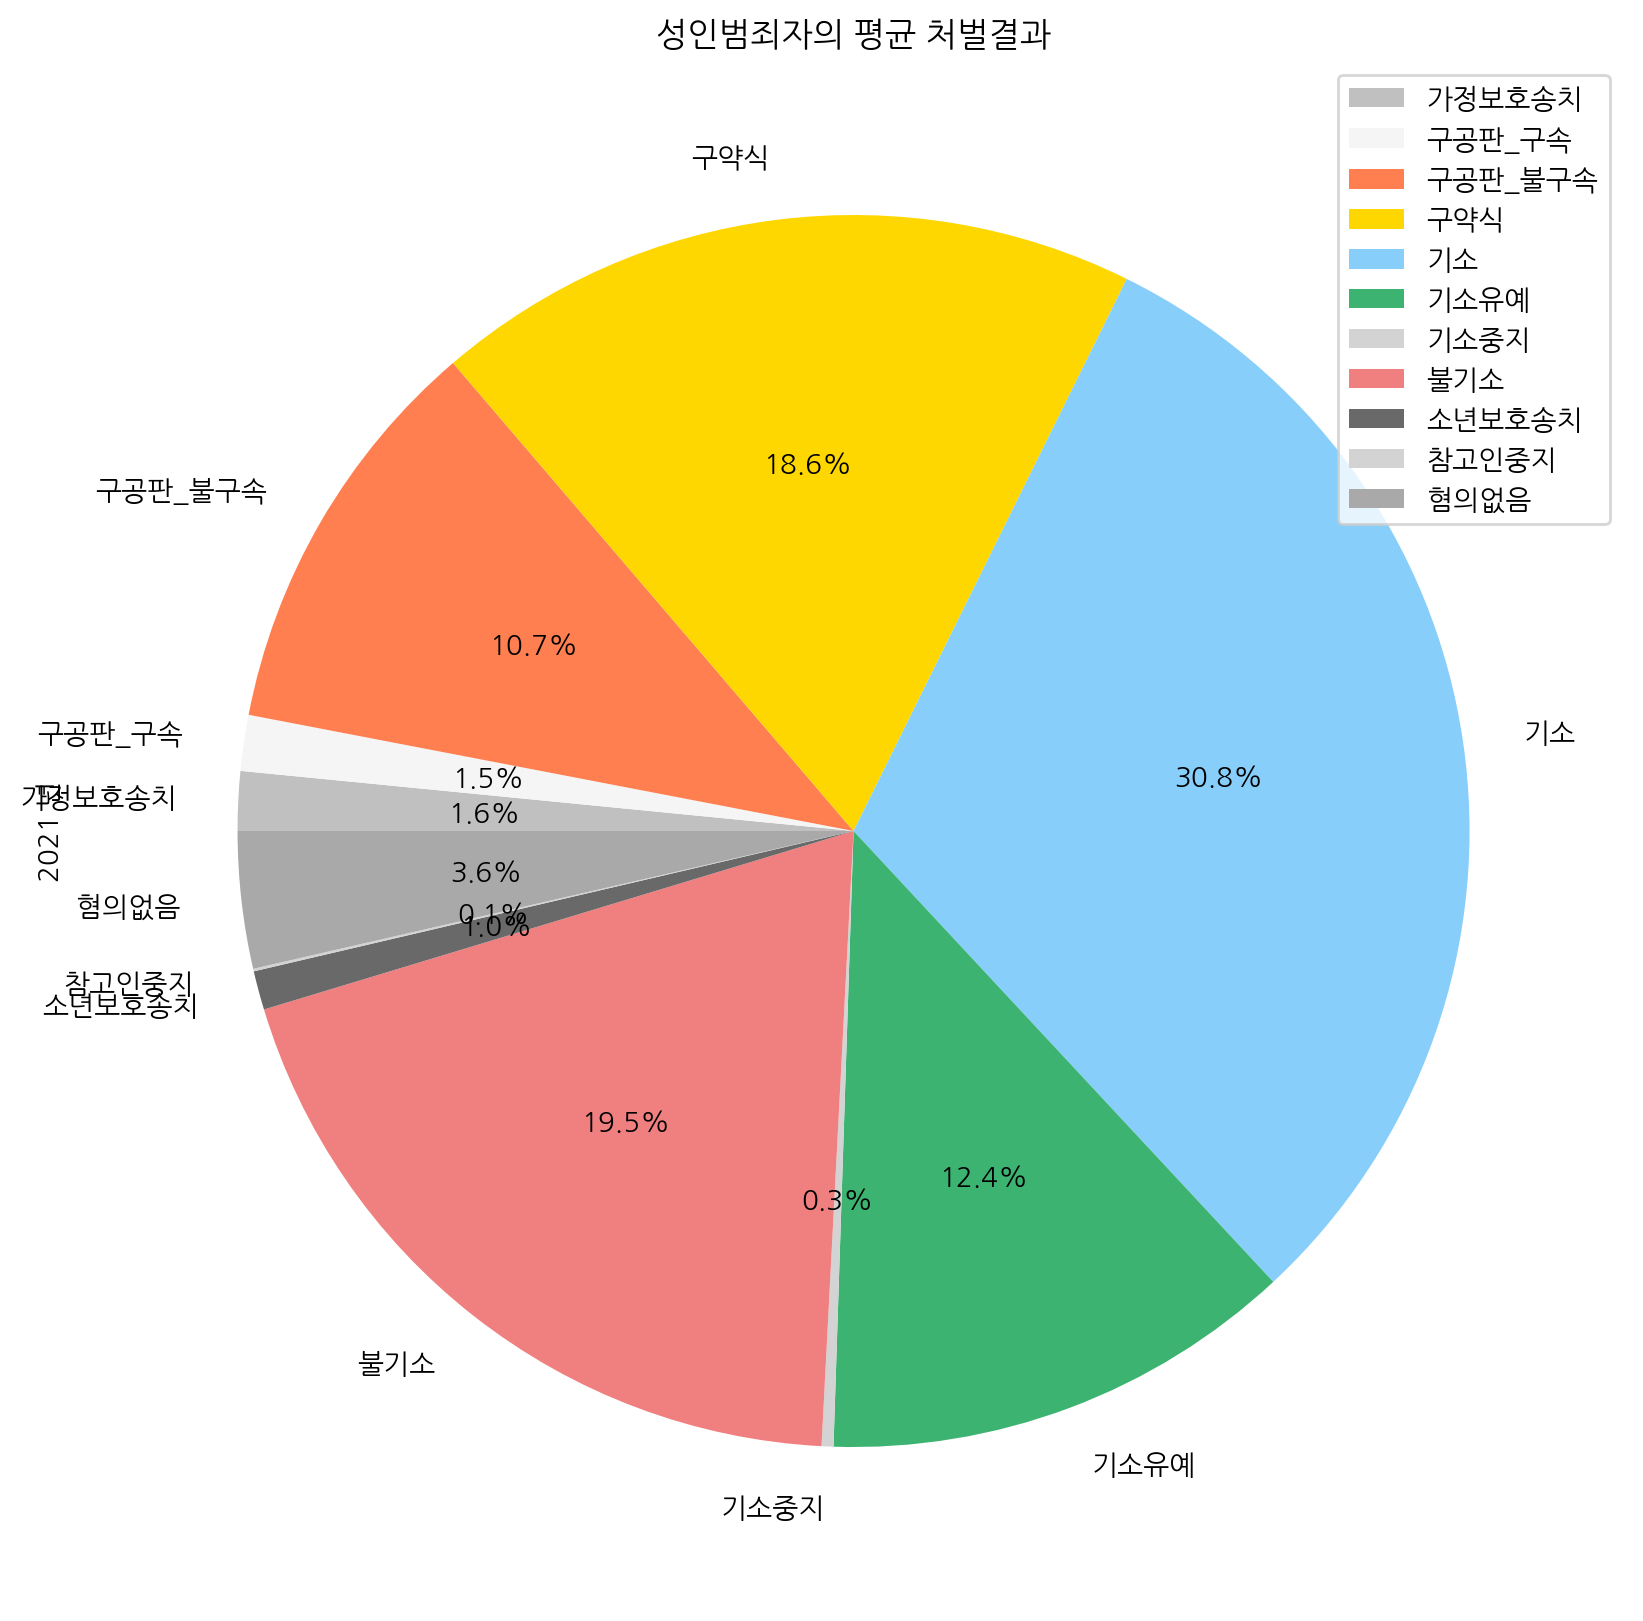

In [38]:

colors = ['silver','whitesmoke','coral', 'gold','lightskyblue','mediumseagreen','lightgrey','lightcoral','dimgrey','lightgray','darkgrey']
df_dis1_2021.plot(kind='pie', figsize=(12,10), subplots=True, autopct='%1.1f%%', startangle=180,counterclock=False,colors=colors)
plt.title("성인범죄자의 평균 처벌결과")

<AxesSubplot:xlabel='처분결과별'>

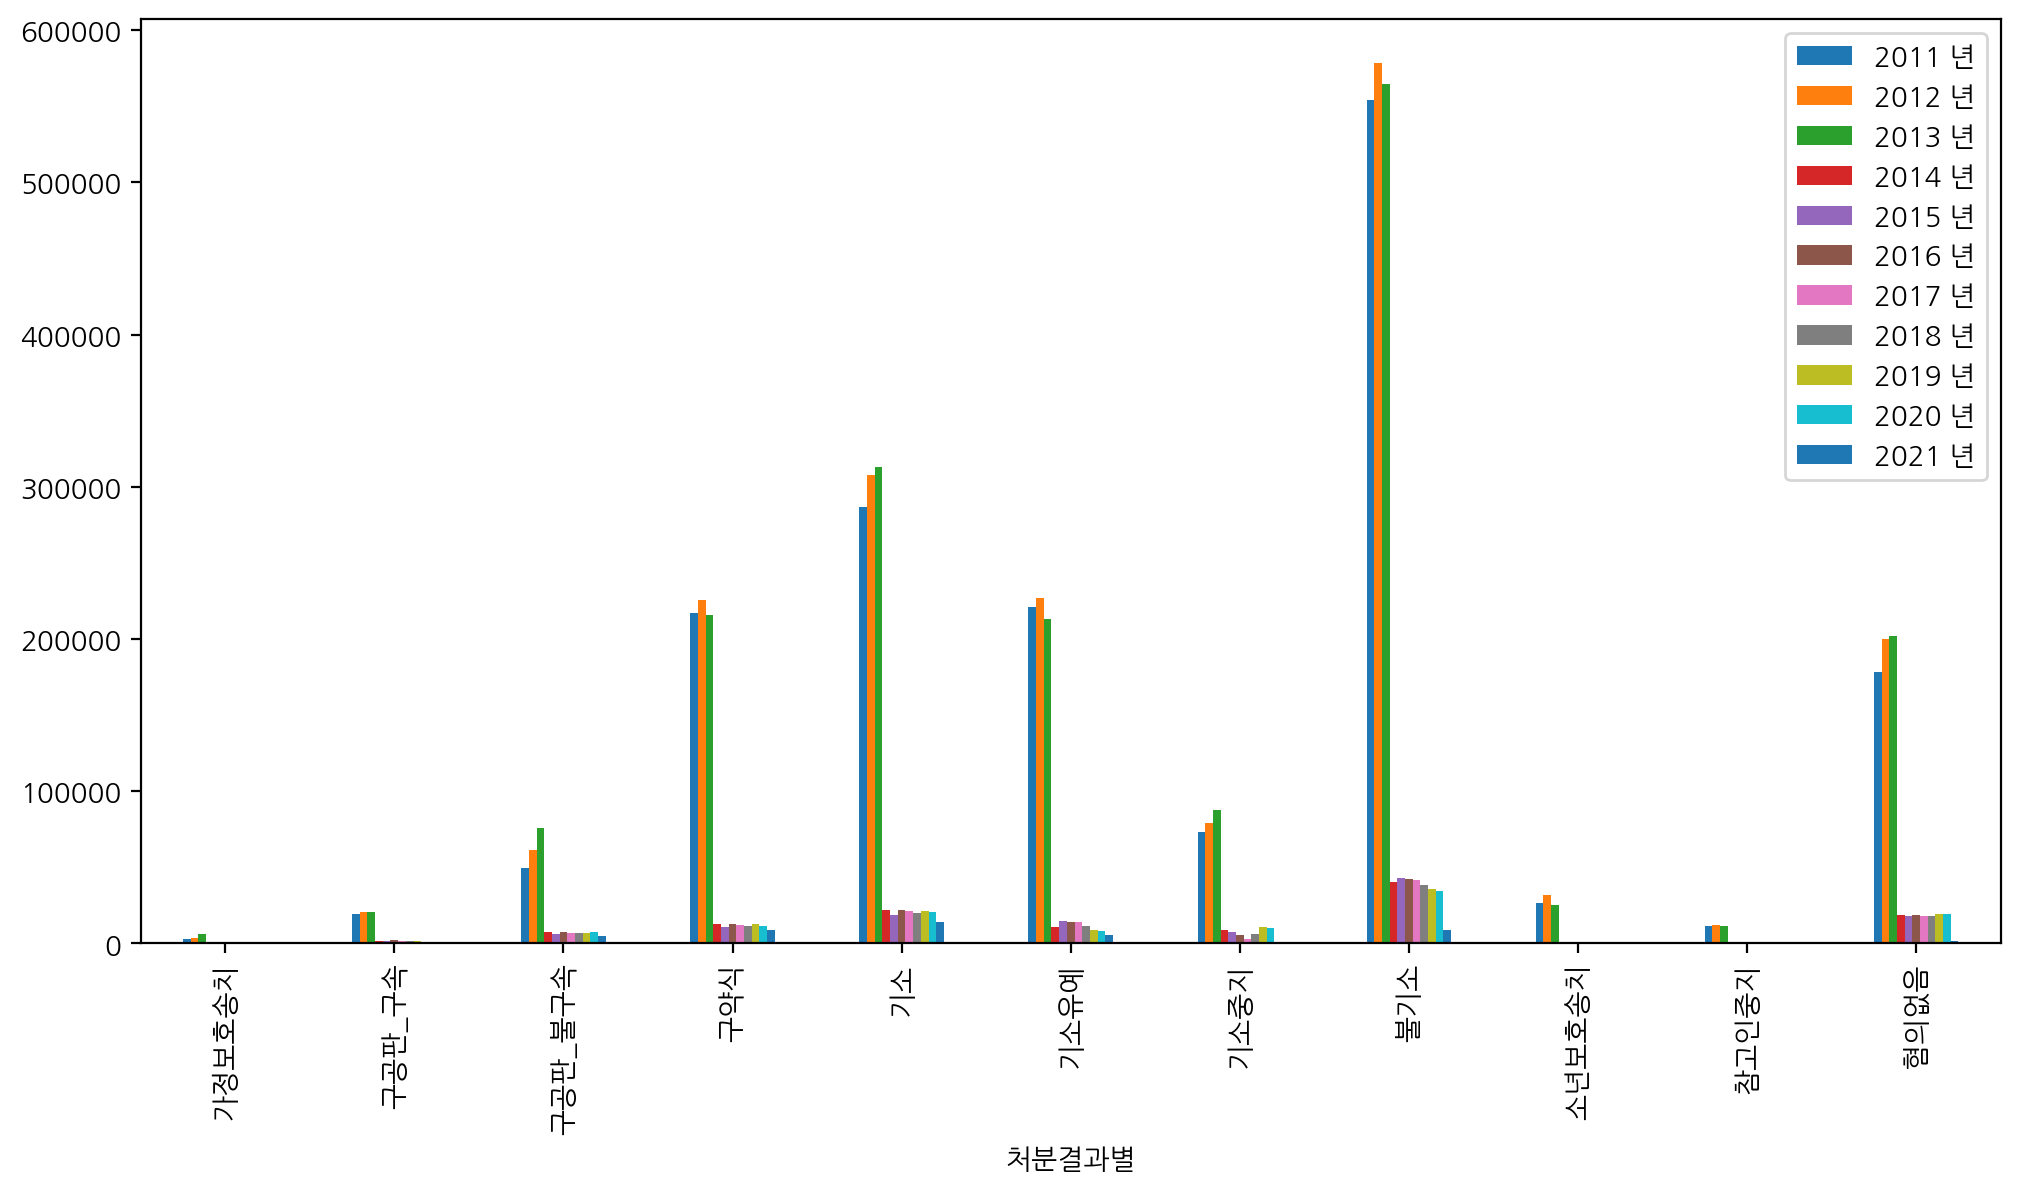

In [86]:
df_dis1.plot.bar(figsize=(12,6))

In [87]:
dis1 = df_dis1.transpose()
dis1

처분결과별,가정보호송치,구공판_구속,구공판_불구속,구약식,기소,기소유예,기소중지,불기소,소년보호송치,참고인중지,혐의없음
2011 년,2871,19662,49815,217135,286612,221277,73478,553816,26395,11455,178359
2012 년,3599,20710,61547,225503,307760,226972,79097,578122,31512,11929,199838
2013 년,6369,20892,76028,215866,312786,213419,87547,564558,25134,11451,202092
2014 년,448,1686,7471,13084,22241,10948,8955,40216,590,1258,18605
2015 년,513,1741,5913,11117,18771,14866,7474,43114,558,928,18137
2016 년,636,1974,7242,13030,22246,13875,5225,42202,590,838,18749
2017 년,394,1738,6957,12339,21034,13843,3174,41499,710,807,18339
2018 년,449,1685,6745,11730,20160,11632,6504,38417,616,680,18064
2019 년,486,1546,7015,12804,21365,8612,10707,35898,626,689,19347
2020 년,637,1078,7756,11723,20557,8149,10158,34195,652,688,19435


In [88]:
dis1.dtypes

처분결과별
가정보호송치     int32
구공판_구속     int32
구공판_불구속    int32
구약식        int32
기소         int32
기소유예       int32
기소중지       int32
불기소        int32
소년보호송치     int32
참고인중지      int32
혐의없음       int32
dtype: object

<AxesSubplot:>

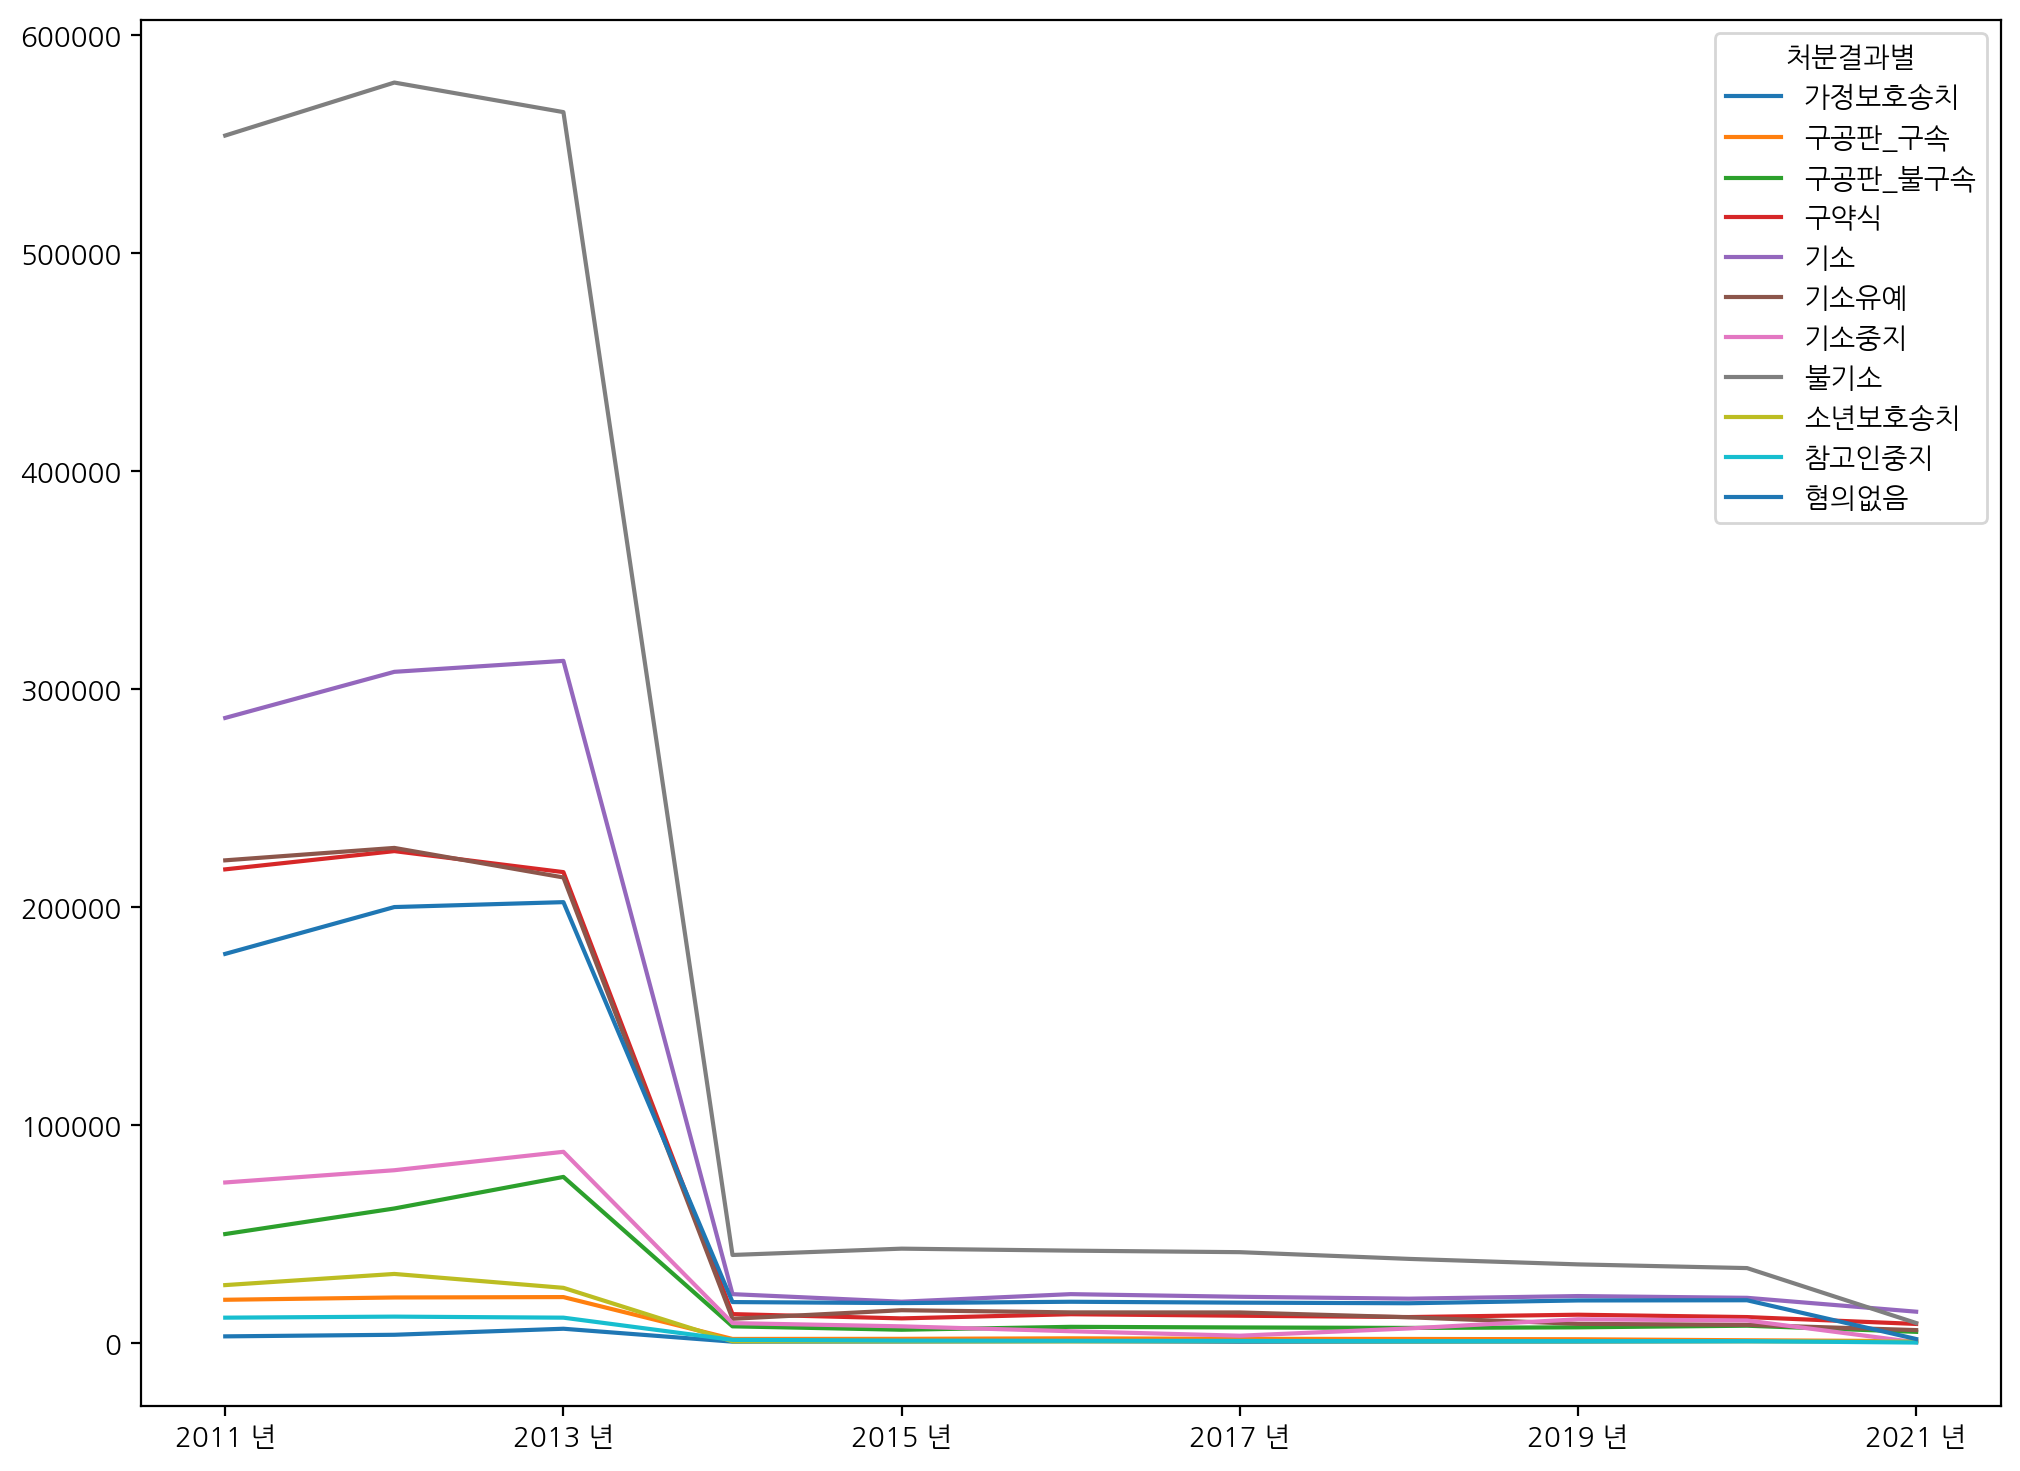

In [89]:
dis1.plot( rot=0, figsize=(12,9))

### 소년범죄자

In [40]:
df_dis2 = pd.read_csv(file_paths[2], encoding='cp949')
df_dis2

,범죄별,처분결과별,항목,단위,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년,Unnamed: 15
0,합계,합계,소녀범죄자 처분결과[명],명,14326,17342,14204,10937,9874,11685,12495.0,11787,11437,10484,9037,NaN
1,합계,기소,소녀범죄자 처분결과[명],명,398,691,739,629,590,575,606.0,734,730,719,721,NaN
2,합계,구공판_구속,소녀범죄자 처분결과[명],명,69,108,62,65,67,47,60.0,67,47,42,26,NaN
3,합계,구공판_불구속,소녀범죄자 처분결과[명],명,138,271,277,241,215,222,226.0,287,321,354,345,NaN
4,합계,구약식,소녀범죄자 처분결과[명],명,191,312,400,323,308,306,320.0,380,362,323,350,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3388,기타특별법,불송치_혐의없음,소녀범죄자 처분결과[명],명,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,NaN
3389,기타특별법,불송치_죄가안됨,소녀범죄자 처분결과[명],명,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3390,기타특별법,불송치_공소권없음,소녀범죄자 처분결과[명],명,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN
3391,기타특별법,수사중지_피의자중지,소녀범죄자 처분결과[명],명,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN


In [41]:
df_dis2 = df_dis2.loc[df_dis2['범죄별'] == '형법범']
df_dis2

,범죄별,처분결과별,항목,단위,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년,Unnamed: 15
23,형법범,합계,소녀범죄자 처분결과[명],명,12446,15032,12151,9174,8036,9643,10390.0,9902,9598,8178,7174,NaN
24,형법범,기소,소녀범죄자 처분결과[명],명,340,563,625,534,478,422,466.0,601,609,551,581,NaN
25,형법범,구공판_구속,소녀범죄자 처분결과[명],명,64,90,56,55,56,28,44.0,49,42,38,19,NaN
26,형법범,구공판_불구속,소녀범죄자 처분결과[명],명,128,231,253,221,191,175,180.0,244,278,270,291,NaN
27,형법범,구약식,소녀범죄자 처분결과[명],명,148,242,316,258,231,219,242.0,308,289,243,271,NaN
28,형법범,소년보호송치,소녀범죄자 처분결과[명],명,4569,5136,3779,2786,2176,2818,3377.0,3376,3270,3106,2568,NaN
29,형법범,가정보호송치,소녀범죄자 처분결과[명],명,-,3,4,5,31,40,42.0,41,39,62,113,NaN
30,형법범,성매매보호송치,소녀범죄자 처분결과[명],명,-,-,-,-,-,-,NaN,-,-,-,-,NaN
31,형법범,아동보호송치,소녀범죄자 처분결과[명],명,NaN,NaN,NaN,NaN,NaN,2,NaN,1,1,-,3,NaN
32,형법범,불기소,소녀범죄자 처분결과[명],명,7165,8896,7205,5318,5028,6037,6420.0,5814,5618,4344,2171,NaN


In [42]:
df_dis2 = df_dis2.drop(['항목','단위', 'Unnamed: 15'], axis=1)
df_dis2.drop([23], axis=0, inplace=True)
df_dis2

,범죄별,처분결과별,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
24,형법범,기소,340,563,625,534,478,422,466.0,601,609,551,581
25,형법범,구공판_구속,64,90,56,55,56,28,44.0,49,42,38,19
26,형법범,구공판_불구속,128,231,253,221,191,175,180.0,244,278,270,291
27,형법범,구약식,148,242,316,258,231,219,242.0,308,289,243,271
28,형법범,소년보호송치,4569,5136,3779,2786,2176,2818,3377.0,3376,3270,3106,2568
29,형법범,가정보호송치,-,3,4,5,31,40,42.0,41,39,62,113
30,형법범,성매매보호송치,-,-,-,-,-,-,NaN,-,-,-,-
31,형법범,아동보호송치,NaN,NaN,NaN,NaN,NaN,2,NaN,1,1,-,3
32,형법범,불기소,7165,8896,7205,5318,5028,6037,6420.0,5814,5618,4344,2171
33,형법범,기소유예,5799,6924,5380,3649,3064,3737,3924.0,3518,3179,2275,1824


In [43]:
df_dis2 = df_dis2.drop(['범죄별'], axis=1)
df_dis2

,처분결과별,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
24,기소,340,563,625,534,478,422,466.0,601,609,551,581
25,구공판_구속,64,90,56,55,56,28,44.0,49,42,38,19
26,구공판_불구속,128,231,253,221,191,175,180.0,244,278,270,291
27,구약식,148,242,316,258,231,219,242.0,308,289,243,271
28,소년보호송치,4569,5136,3779,2786,2176,2818,3377.0,3376,3270,3106,2568
29,가정보호송치,-,3,4,5,31,40,42.0,41,39,62,113
30,성매매보호송치,-,-,-,-,-,-,NaN,-,-,-,-
31,아동보호송치,NaN,NaN,NaN,NaN,NaN,2,NaN,1,1,-,3
32,불기소,7165,8896,7205,5318,5028,6037,6420.0,5814,5618,4344,2171
33,기소유예,5799,6924,5380,3649,3064,3737,3924.0,3518,3179,2275,1824


In [44]:
df_dis2 = df_dis2.set_index("처분결과별")
df_dis2 = df_dis2.sort_index()
df_dis2.head()

,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
처분결과별,,,,,,,,,,,
가정보호송치,-,3,4,5,31,40,42.0,41,39,62,113
공소권없음,641,919,826,774,889,1166,1397.0,1185,1280,921,261
공소보류,-,-,-,-,-,-,NaN,-,-,-,-
구공판_구속,64,90,56,55,56,28,44.0,49,42,38,19
구공판_불구속,128,231,253,221,191,175,180.0,244,278,270,291


In [45]:
df_dis2 = df_dis2.dropna(axis=0)
df_dis2

,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
처분결과별,,,,,,,,,,,
가정보호송치,-,3,4,5,31,40,42.0,41,39,62,113
공소권없음,641,919,826,774,889,1166,1397.0,1185,1280,921,261
구공판_구속,64,90,56,55,56,28,44.0,49,42,38,19
구공판_불구속,128,231,253,221,191,175,180.0,244,278,270,291
구약식,148,242,316,258,231,219,242.0,308,289,243,271
기소,340,563,625,534,478,422,466.0,601,609,551,581
기소유예,5799,6924,5380,3649,3064,3737,3924.0,3518,3179,2275,1824
기소중지,359,415,513,506,297,319,79.0,62,59,46,2
불기소,7165,8896,7205,5318,5028,6037,6420.0,5814,5618,4344,2171


In [46]:
dis2 = df_dis2.astype({'2017 년': 'int'})
dis2

,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
처분결과별,,,,,,,,,,,
가정보호송치,-,3,4,5,31,40,42,41,39,62,113
공소권없음,641,919,826,774,889,1166,1397,1185,1280,921,261
구공판_구속,64,90,56,55,56,28,44,49,42,38,19
구공판_불구속,128,231,253,221,191,175,180,244,278,270,291
구약식,148,242,316,258,231,219,242,308,289,243,271
기소,340,563,625,534,478,422,466,601,609,551,581
기소유예,5799,6924,5380,3649,3064,3737,3924,3518,3179,2275,1824
기소중지,359,415,513,506,297,319,79,62,59,46,2
불기소,7165,8896,7205,5318,5028,6037,6420,5814,5618,4344,2171


In [47]:
df_dis2 = dis2.replace('-','0')
df_dis2

,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
처분결과별,,,,,,,,,,,
가정보호송치,0,3,4,5,31,40,42,41,39,62,113
공소권없음,641,919,826,774,889,1166,1397,1185,1280,921,261
구공판_구속,64,90,56,55,56,28,44,49,42,38,19
구공판_불구속,128,231,253,221,191,175,180,244,278,270,291
구약식,148,242,316,258,231,219,242,308,289,243,271
기소,340,563,625,534,478,422,466,601,609,551,581
기소유예,5799,6924,5380,3649,3064,3737,3924,3518,3179,2275,1824
기소중지,359,415,513,506,297,319,79,62,59,46,2
불기소,7165,8896,7205,5318,5028,6037,6420,5814,5618,4344,2171


In [48]:
df_dis2.dtypes

2011 년    object
2012 년    object
2013 년    object
2014 년    object
2015 년    object
2016 년    object
2017 년     int32
2018 년    object
2019 년    object
2020 년    object
2021 년    object
dtype: object

In [49]:
df_dis2 = df_dis2.astype('int')
df_dis2

,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
처분결과별,,,,,,,,,,,
가정보호송치,0,3,4,5,31,40,42,41,39,62,113
공소권없음,641,919,826,774,889,1166,1397,1185,1280,921,261
구공판_구속,64,90,56,55,56,28,44,49,42,38,19
구공판_불구속,128,231,253,221,191,175,180,244,278,270,291
구약식,148,242,316,258,231,219,242,308,289,243,271
기소,340,563,625,534,478,422,466,601,609,551,581
기소유예,5799,6924,5380,3649,3064,3737,3924,3518,3179,2275,1824
기소중지,359,415,513,506,297,319,79,62,59,46,2
불기소,7165,8896,7205,5318,5028,6037,6420,5814,5618,4344,2171


In [54]:
df_dis2_2021 = df_dis2.drop(['2011 년','2012 년','2013 년','2014 년','2015 년','2016 년','2017 년','2018 년','2019 년','2020 년'], axis=1)
df_dis2_2021

,2021 년
처분결과별,
가정보호송치,113
공소권없음,261
구공판_구속,19
구공판_불구속,291
구약식,271
기소,581
기소유예,1824
기소중지,2
불기소,2171


<AxesSubplot:xlabel='처분결과별'>

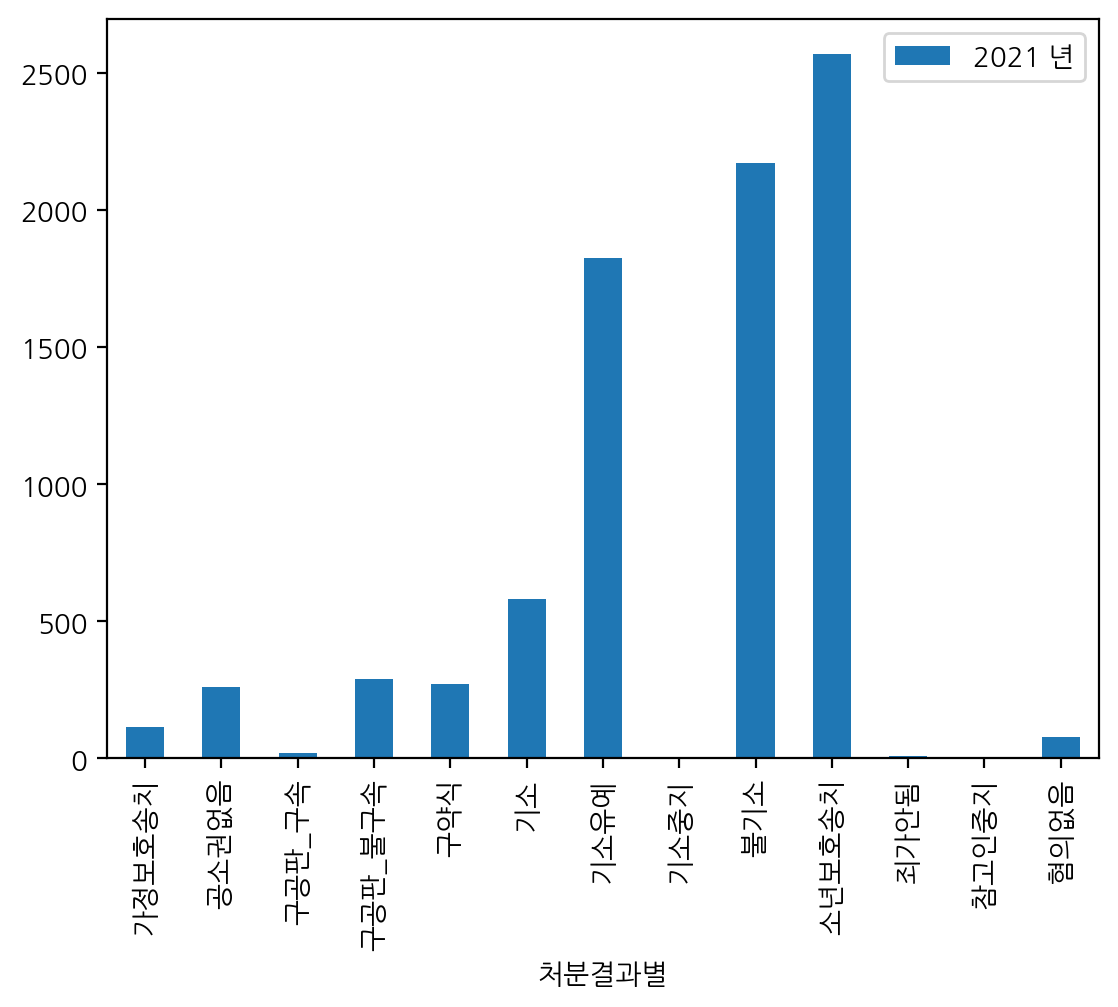

In [61]:
df_dis2_2021.plot.bar()

Text(0.5, 1.0, '소년범죄자의 평균 처벌결과')

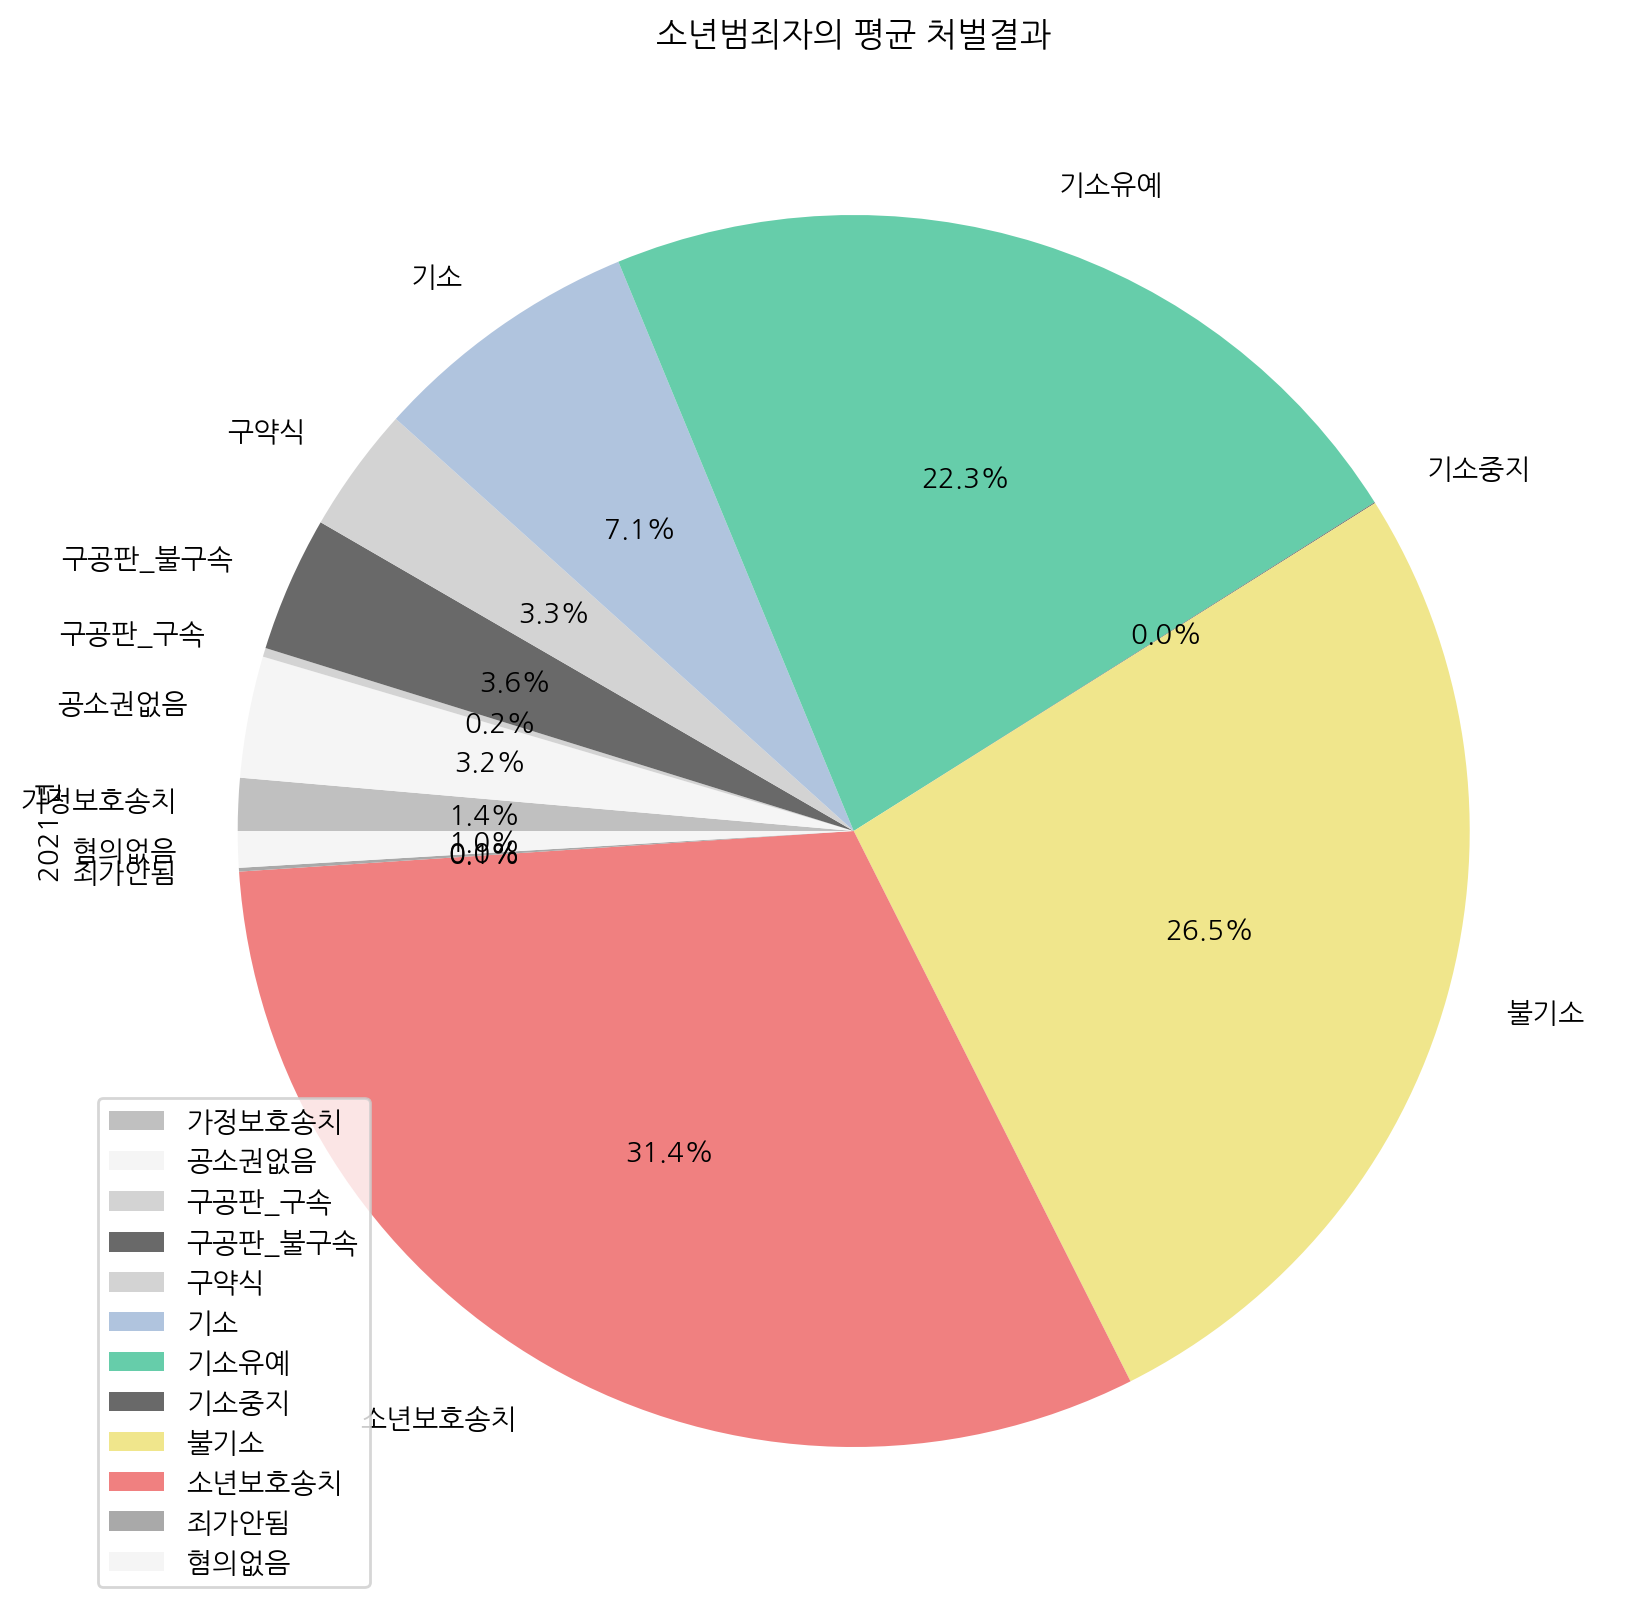

In [71]:
colors = ['silver','whitesmoke','lightgrey','dimgray', 'lightgrey','lightsteelblue','mediumaquamarine','dimgrey','khaki','lightcoral','darkgrey']
df_dis2_2021.plot(kind='pie', figsize=(12,10), subplots=True, autopct='%1.1f%%', startangle=180,counterclock=False,colors=colors)
plt.title("소년범죄자의 평균 처벌결과")

<AxesSubplot:xlabel='처분결과별'>

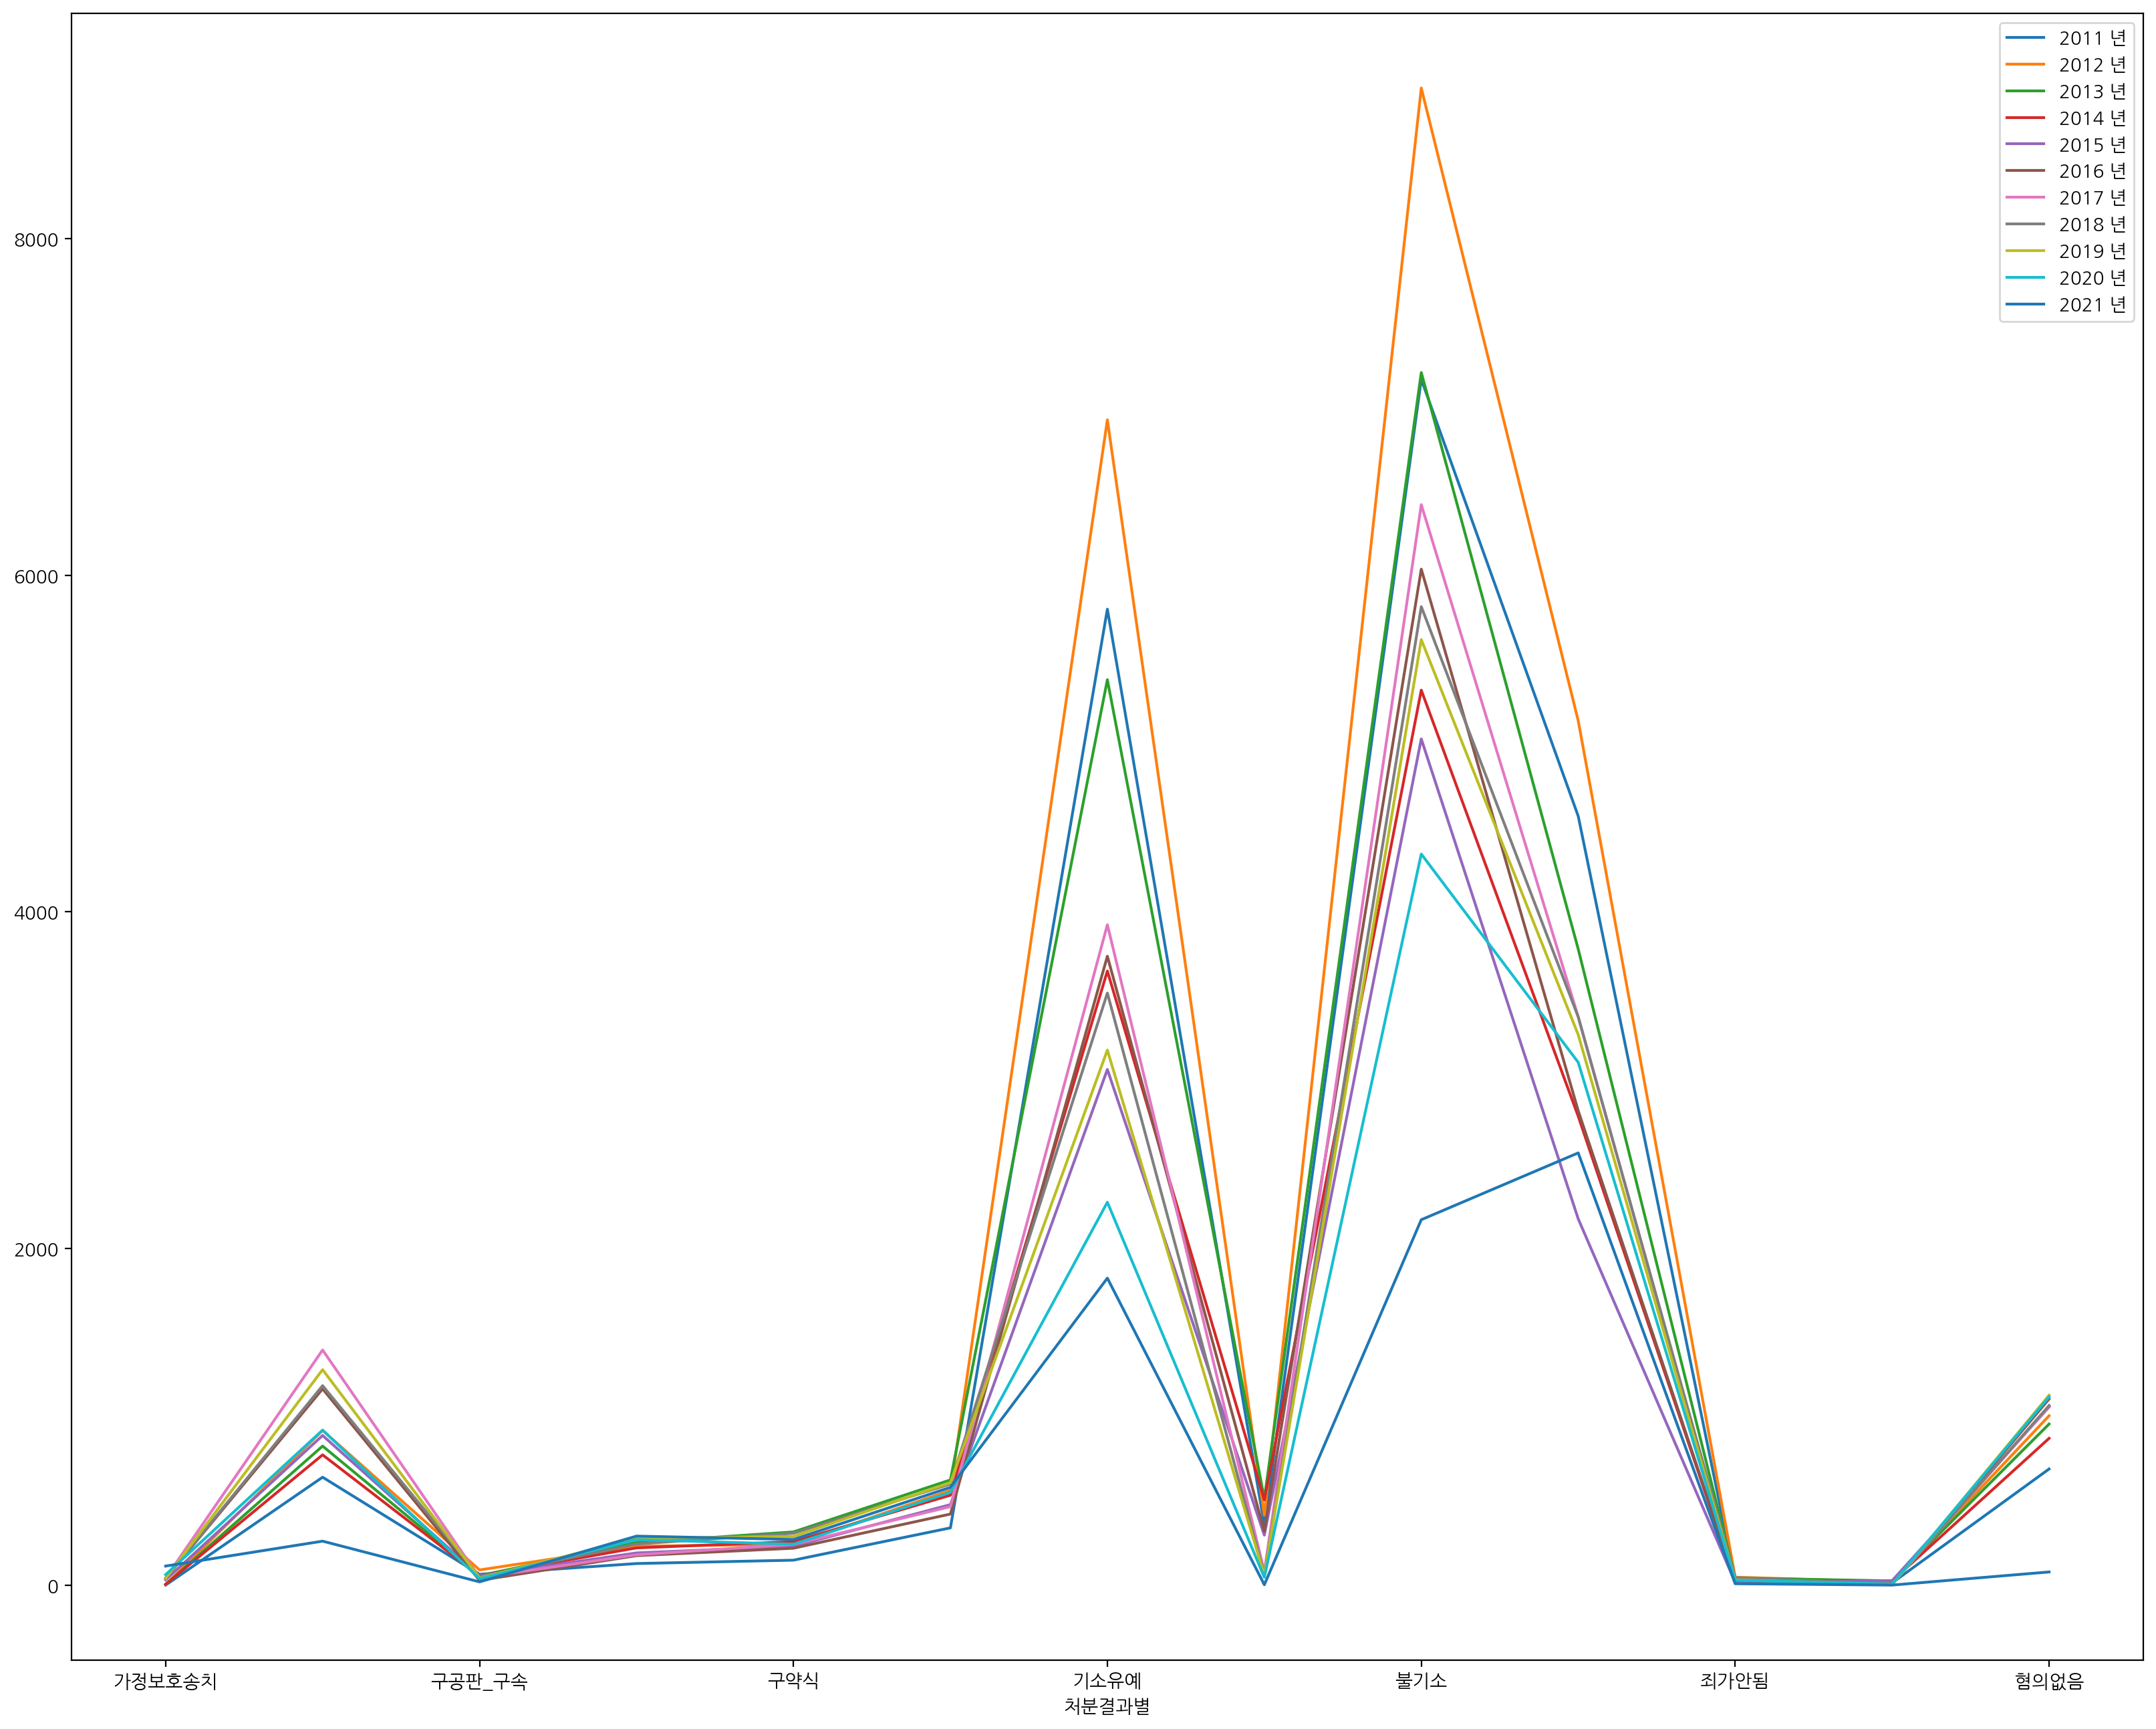

In [41]:
df_dis2.plot(figsize=(20,16))

In [32]:
dis2 = df_dis2.transpose()
dis2

처분결과별,가정보호송치,공소권없음,구공판_구속,구공판_불구속,구약식,기소,기소유예,기소중지,불기소,소년보호송치,죄가안됨,참고인중지,혐의없음
2011 년,0,641,64,128,148,340,5799,359,7165,4569,35,13,690
2012 년,3,919,90,231,242,563,6924,415,8896,5136,47,19,1006
2013 년,4,826,56,253,316,625,5380,513,7205,3779,42,25,957
2014 년,5,774,55,221,258,534,3649,506,5318,2786,23,25,872
2015 년,31,889,56,191,231,478,3064,297,5028,2176,17,26,1058
2016 년,40,1166,28,175,219,422,3737,319,6037,2818,28,5,1106
2017 년,42,1397,44,180,242,466,3924,79,6420,3377,37,6,1062
2018 년,41,1185,49,244,308,601,3518,62,5814,3376,44,7,1067
2019 년,39,1280,42,278,289,609,3179,59,5618,3270,31,2,1128
2020 년,62,921,38,270,243,551,2275,46,4344,3106,29,6,1119


In [68]:
dis2.dtypes

처분결과별
가정보호송치     int32
공소권없음      int32
구공판_구속     int32
구공판_불구속    int32
구약식        int32
기소         int32
기소유예       int32
기소중지       int32
불기소        int32
소년보호송치     int32
죄가안됨       int32
참고인중지      int32
혐의없음       int32
dtype: object

<AxesSubplot:>

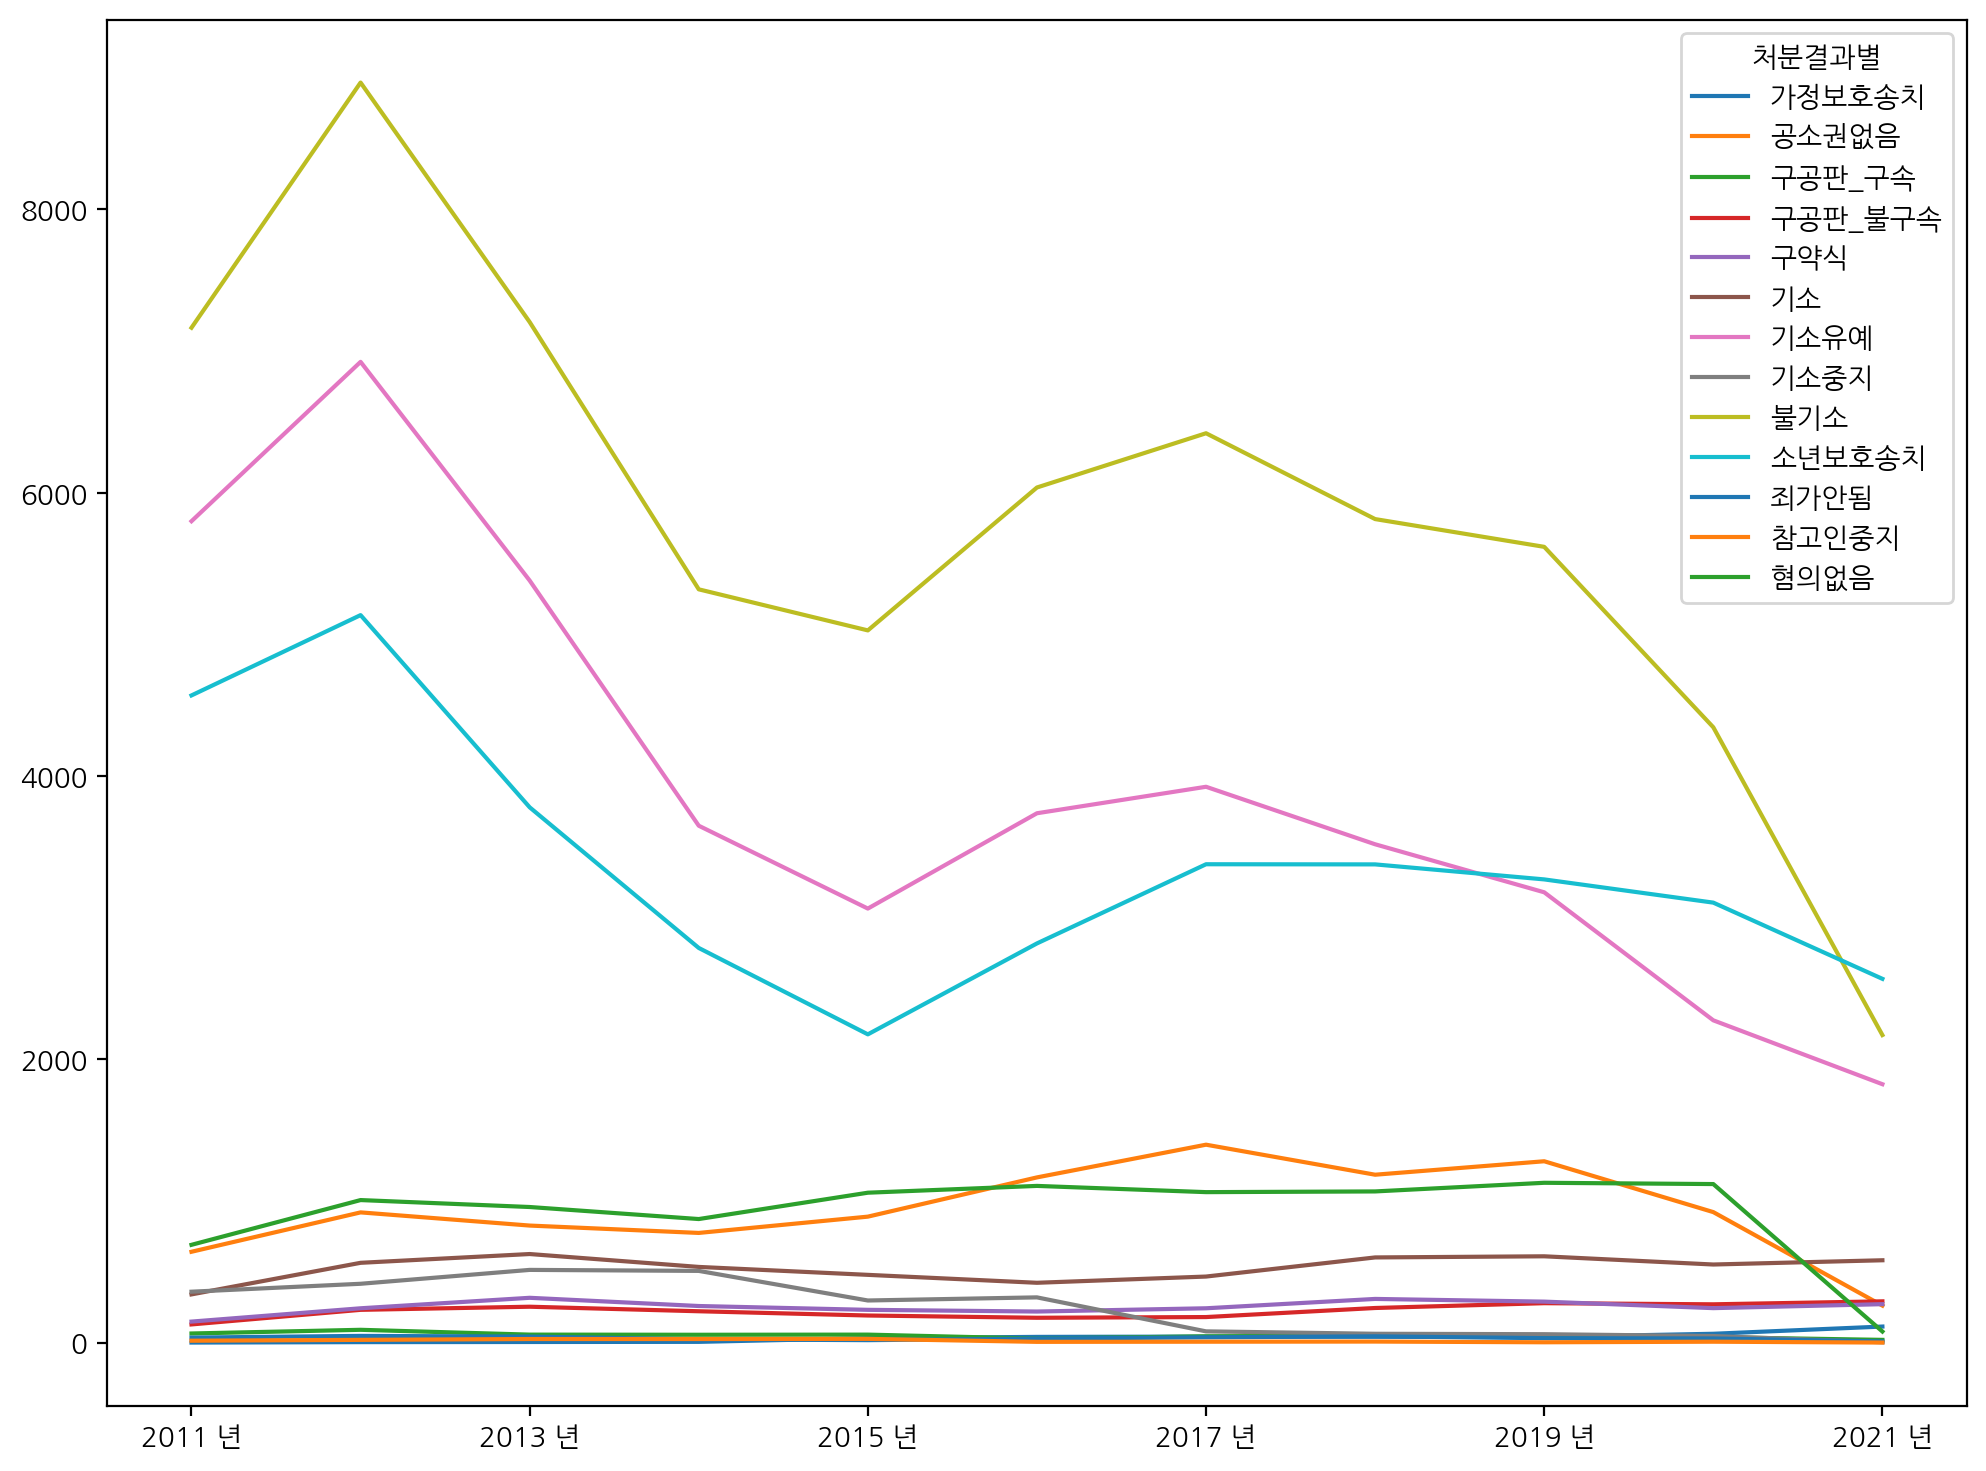

In [42]:
dis2.plot( rot=0, figsize=(12,9))

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

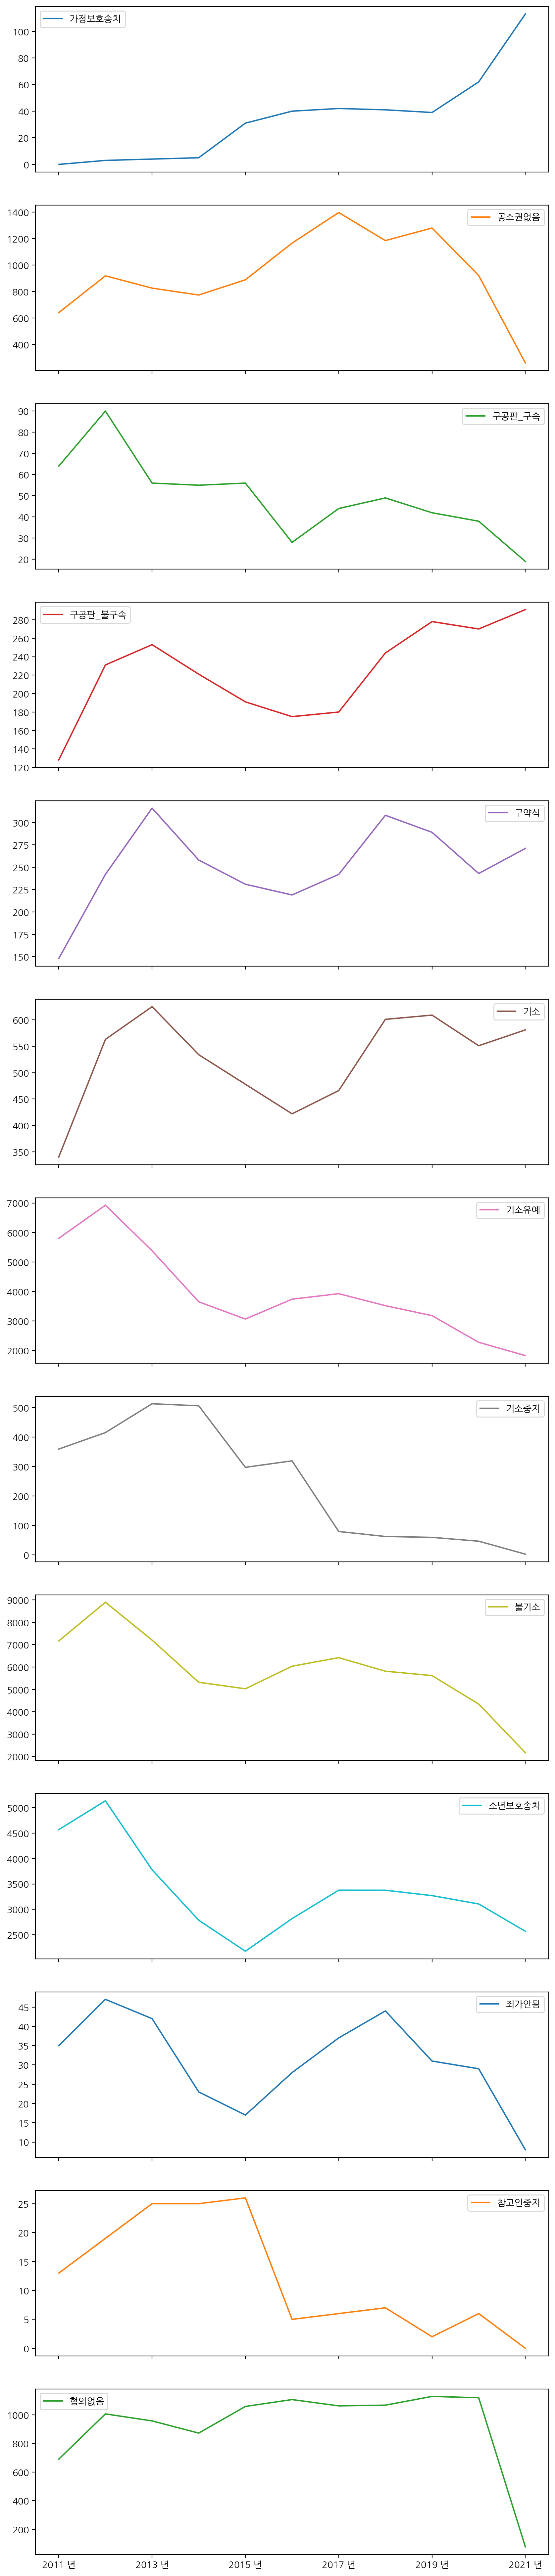

In [70]:
dis2.plot( rot=0, figsize=(10,50), subplots=True)